# Linear Regression Assignment

## Bike Sharing Case Study

### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

**The company wants to know:**

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

# Importing important libraries and supressing warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


#### **Other libraries relevant for our assignment shall be imported as per our requirement as we proceed further.** 

# Understanding the data

In [2]:
ciclo = pd.read_csv('day.csv')

In [3]:
ciclo.shape

(730, 16)

In [4]:
ciclo.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
ciclo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
ciclo.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No null values are present in the dataset

In [7]:
ciclo.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
ciclo.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Lets take care of the misspelt columns and short forms

In [9]:
ciclo.rename(columns= {'dteday':'date','yr':'year','mnth':'month', 'weathersit':'day_weather','atemp':'feels', 'hum': 'humidity','cnt':'count'}, inplace=True)
ciclo.head()

,instant,date,season,year,month,holiday,weekday,workingday,day_weather,temp,feels,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### The column feels refers to the temperature a person would feel while on a ride outside.

## From the data dictionary we see that there are some columns which represents categorical data as well.

- Binary Types : Year, holiday, workingday
- Categorical Types: Season, Month, weekday, Weather
- Numeric types: temp, atemp, Humidity, windspeed, Count

In [10]:
#Mapping variables into categorical values
ciclo['season']= ciclo.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
ciclo.month = ciclo.month.map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov', 12:'Dec'})
ciclo.weekday = ciclo.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
ciclo.day_weather = ciclo.day_weather.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})


In [11]:
ciclo.head()

,instant,date,season,year,month,holiday,weekday,workingday,day_weather,temp,feels,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Initial insights

- 730 rows and 16 columns.

**From data dictionary we understood that :**
- **Instant** is just a record index, **can be removed**.
- **Date** column is an extra and we already have month and year columns in dataframe, **can be removed**. 
- Also when considering last 3 columns the **addition of casual and registered columns gives cnt column, thus we will drop these two as well.**
- There seems to be no missing values as we derived earlier.
- **TARGET variable/column is 'cnt'**

In [12]:
#creating final dataset
ciclo.drop(['instant','date','casual','registered'], axis=1, inplace=True)
ciclo.head()

,season,year,month,holiday,weekday,workingday,day_weather,temp,feels,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# visualising the data through pair plots

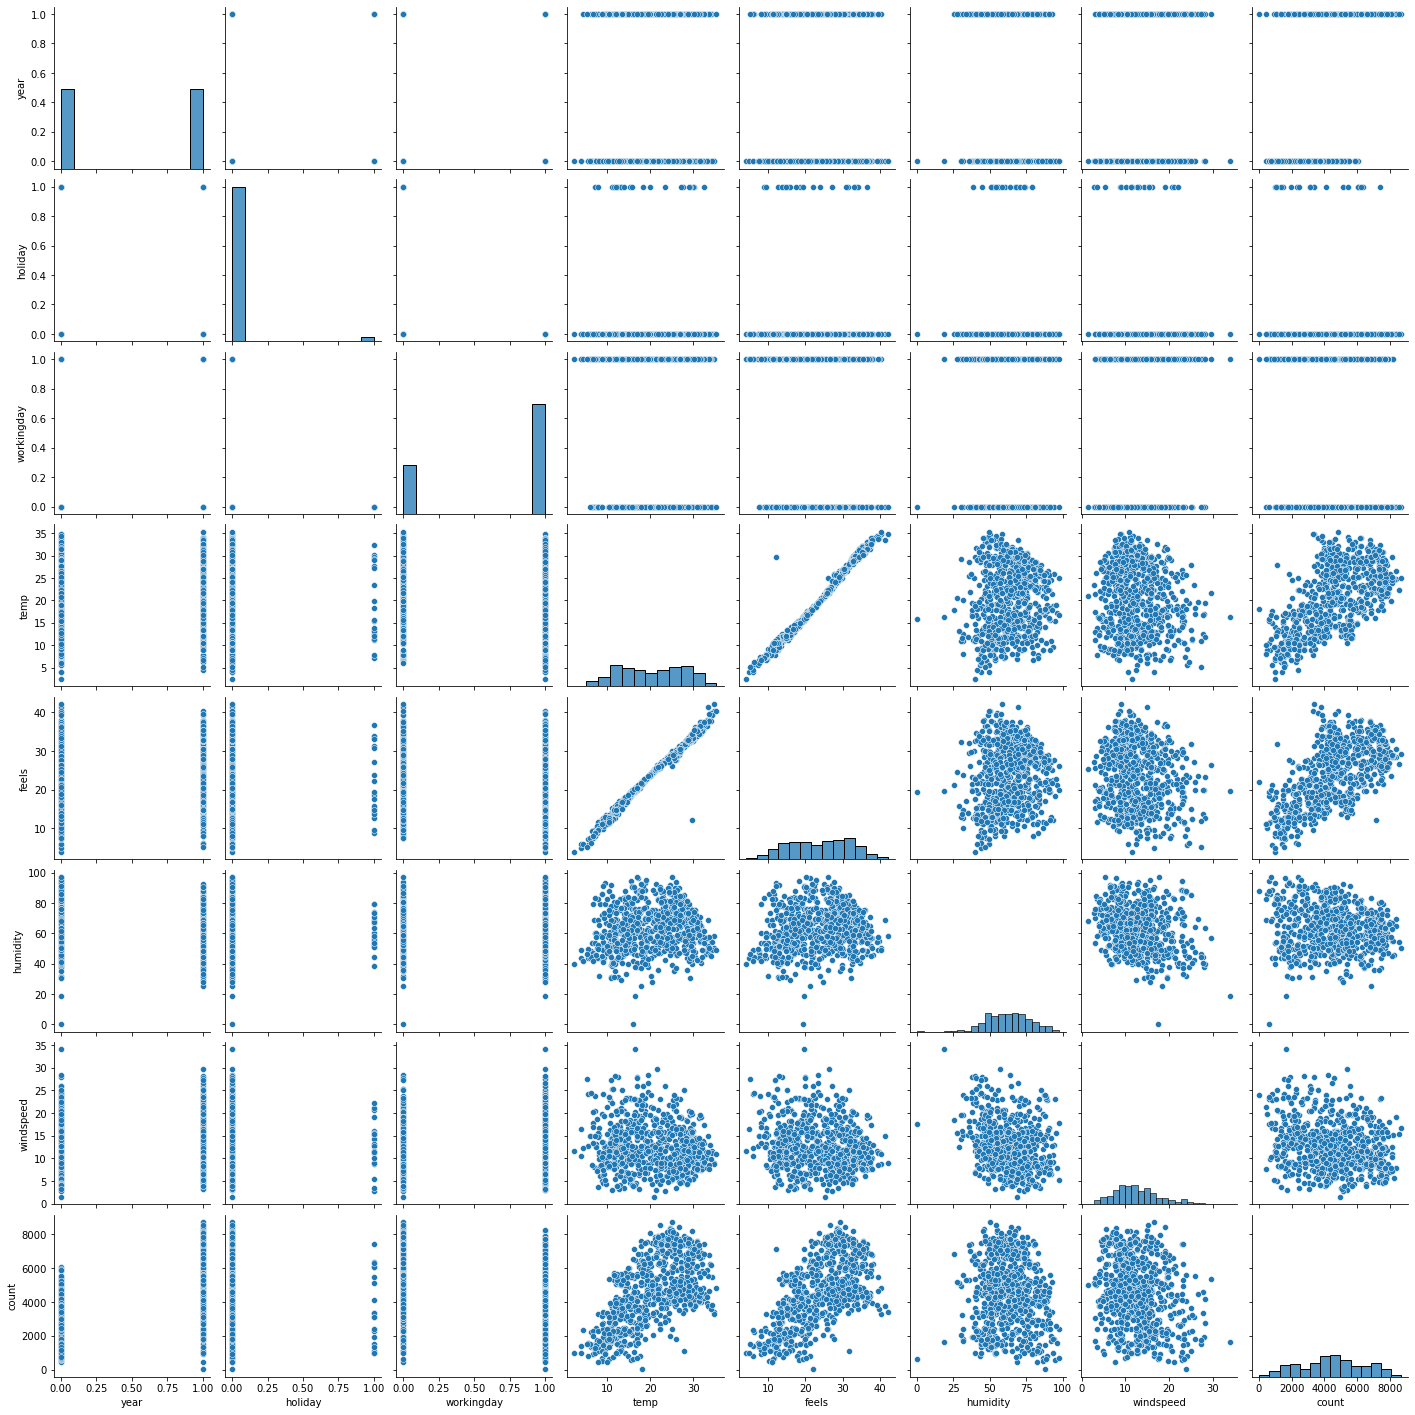

In [13]:
sns.pairplot(ciclo)
plt.show()

**temperature seems to play an important role in bike counts**

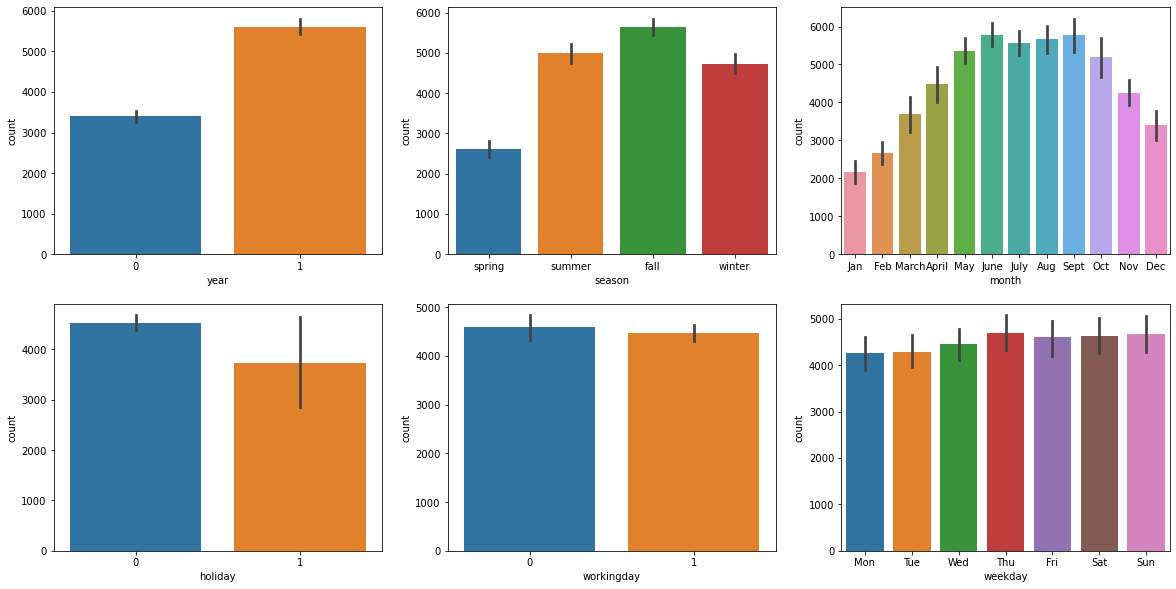

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.barplot(x= 'year', y='count', data= ciclo)

plt.subplot(2,3,2)
sns.barplot(x= 'season', y='count', data= ciclo)

plt.subplot(2,3,3)
sns.barplot(x= 'month', y='count', data= ciclo)

plt.subplot(2,3,4)
sns.barplot(x= 'holiday', y='count', data= ciclo)

plt.subplot(2,3,5)
sns.barplot(x= 'workingday', y='count', data= ciclo)

plt.subplot(2,3,6)
sns.barplot(x= 'weekday', y='count', data= ciclo)

plt.show()

## Inferences
- 2019 was the year of maximum count.
- seasonwise it is clear that the summer and fall seasons are most preffered with winter coming at third most favourable and spring the least favourable
- talking about the whole year as a collective the trend is clearly visible that during mid year that is the months when the temperature starts setting in the demand rises and falls as winter month or year end approaches. it is acceptable and understood as well because most rides would prefer a calm climate rather than harsh.
- the weekday graph is similar for all the days with just minor differences.
- in the holiday chart less counts are present when it was a holiday as well as the workingday chart has similar readings irrespective of the fact that it was working day or not.

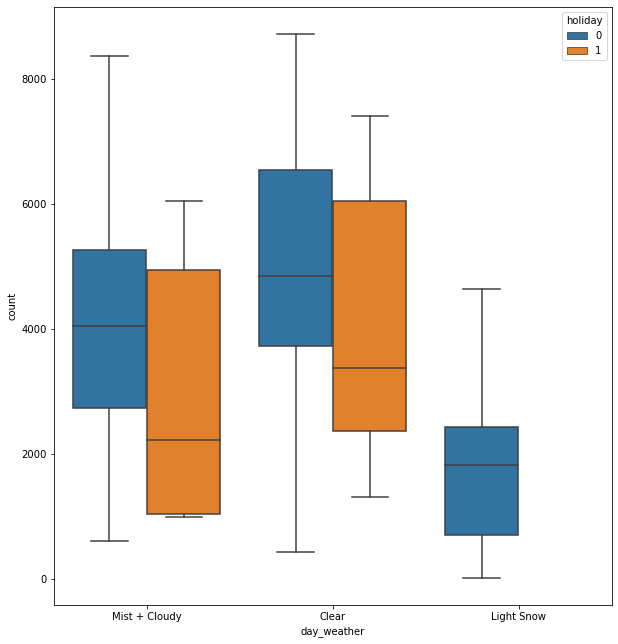

In [15]:
plt.figure(figsize=[10,11])
sns.boxplot(x= 'day_weather', y='count',hue='holiday', data = ciclo)
plt.show()

**rentals are more in partly cloudy weather.**

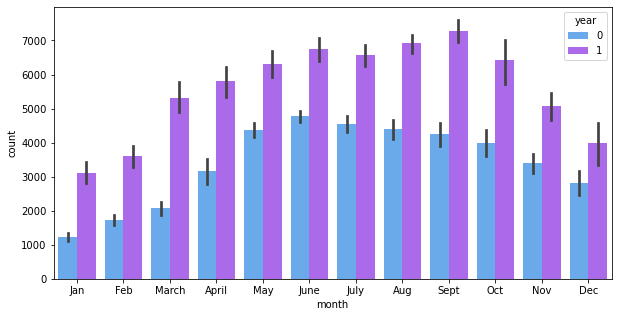

In [16]:
#Relation between month and year
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=ciclo,palette='cool', color='yl')
plt.show()

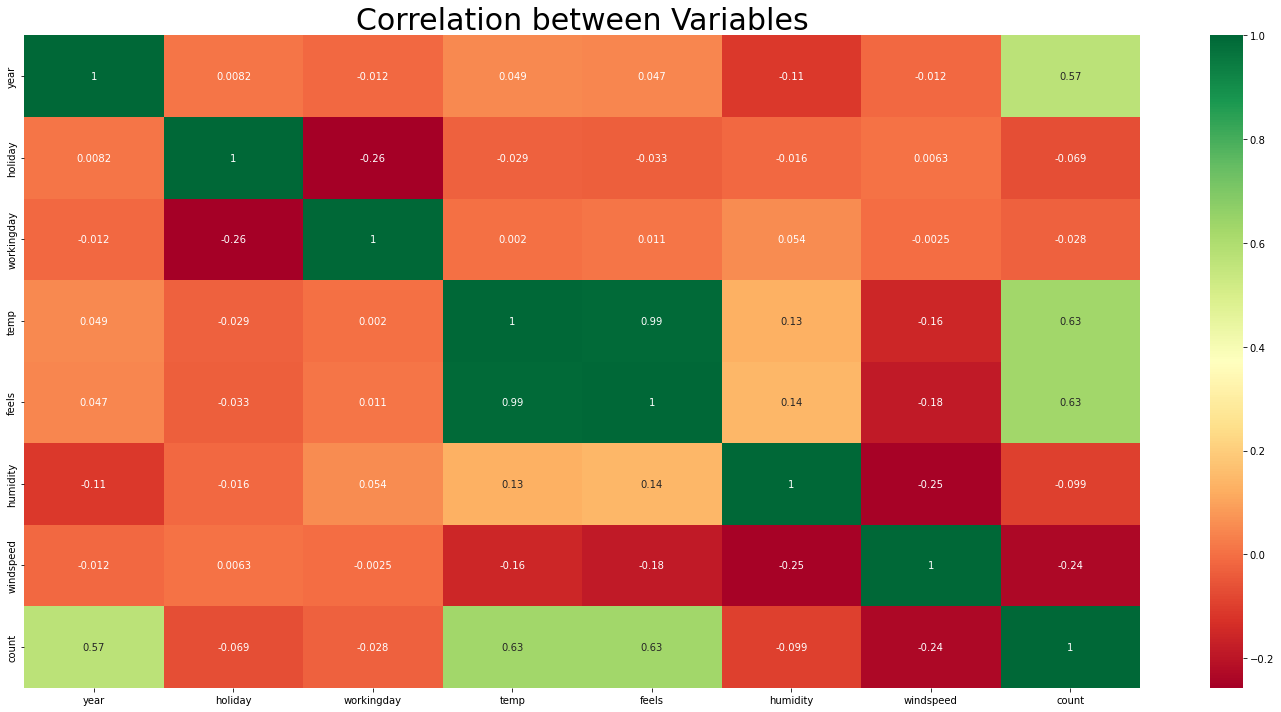

In [17]:
plt.figure(figsize=(25, 12))
sns.heatmap(ciclo.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables", fontsize= 30)
plt.show()

## In this heat map we can see a correlation between temp, temp related terms and count. 

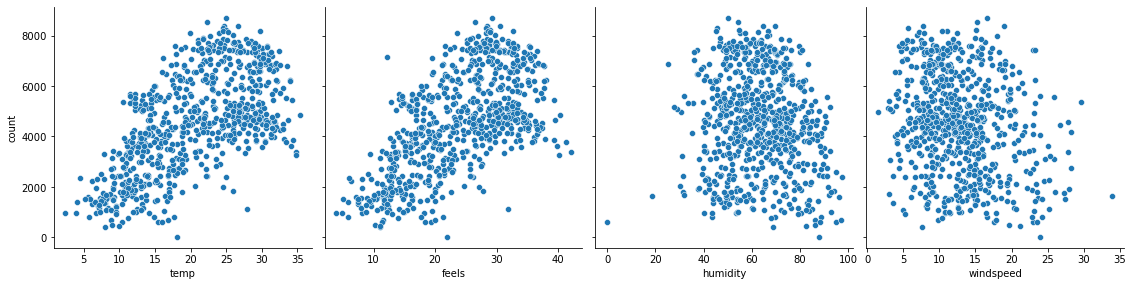

In [18]:
# lets examine it through a scatterplot
sns.pairplot(ciclo, x_vars=['temp','feels','humidity','windspeed'], y_vars='count',size=4, aspect=1, kind='scatter', diag_kind = None)
plt.show()


**Insight:**
- **as can be seen from above plots, there is some linear relation between temp, feels with Count.**
- **this shows that we can do linear regression for solving the problem.**

-----
**Independent variables which could be a good predictor from EDA are:**
- **temp**
- **Weather**
- **Months**
- **Seasons**
- **workingday**

However workingday could prove unuseful as it varies very little. lets see how this worksout.

## Data Prepartion
**Creating dummy variables**

In [19]:
ciclo.head()

,season,year,month,holiday,weekday,workingday,day_weather,temp,feels,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
#Dealing With Categorical Variables
cat_var = ['season','month','weekday', 'day_weather','workingday']
dummy = pd.get_dummies(ciclo[cat_var], drop_first=True)
dummy.head()


,workingday,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,day_weather_Light Snow,day_weather_Mist + Cloudy
0,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
ciclo = pd.concat([ciclo, dummy], axis = 1)
ciclo.head()

,season,year,month,holiday,weekday,workingday,day_weather,temp,feels,humidity,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,day_weather_Light Snow,day_weather_Mist + Cloudy
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# dropping the categorical variables
ciclo.drop(['season','workingday','day_weather','weekday','month'],axis=1,inplace=True)
ciclo.head()


,year,holiday,temp,feels,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,day_weather_Light Snow,day_weather_Mist + Cloudy
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
ciclo.shape

(730, 29)

In [24]:
ciclo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   temp                       730 non-null    float64
 3   feels                      730 non-null    float64
 4   humidity                   730 non-null    float64
 5   windspeed                  730 non-null    float64
 6   count                      730 non-null    int64  
 7   season_spring              730 non-null    uint8  
 8   season_summer              730 non-null    uint8  
 9   season_winter              730 non-null    uint8  
 10  month_Aug                  730 non-null    uint8  
 11  month_Dec                  730 non-null    uint8  
 12  month_Feb                  730 non-null    uint8  
 13  month_Jan                  730 non-null    uint8  

##  Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [25]:
from sklearn.model_selection import train_test_split

ciclo_train, ciclo_test = train_test_split(ciclo, train_size = 0.7, random_state = 100)

### Rescaling the Features 

For Simple Linear Regression, scaling doesn't impact your model. Here we can see that the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [26]:
print(ciclo_train.shape)
print(ciclo_test.shape)

(510, 29)
(220, 29)


In [27]:
from sklearn.preprocessing import MinMaxScaler
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
# Here we wont be using the column feels in order to avoid multicollinearity.
num_vars=['temp','humidity','windspeed','count']

#Fit on data
ciclo_train[num_vars] = scaler.fit_transform(ciclo_train[num_vars])
ciclo_train.head()

,year,holiday,temp,feels,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,day_weather_Light Snow,day_weather_Mist + Cloudy
576,1,0,0.815169,33.1448,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,20.6746,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0.245101,11.5850,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0.395666,18.8752,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0.345824,16.0977,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


## Lets check for multicollinearity

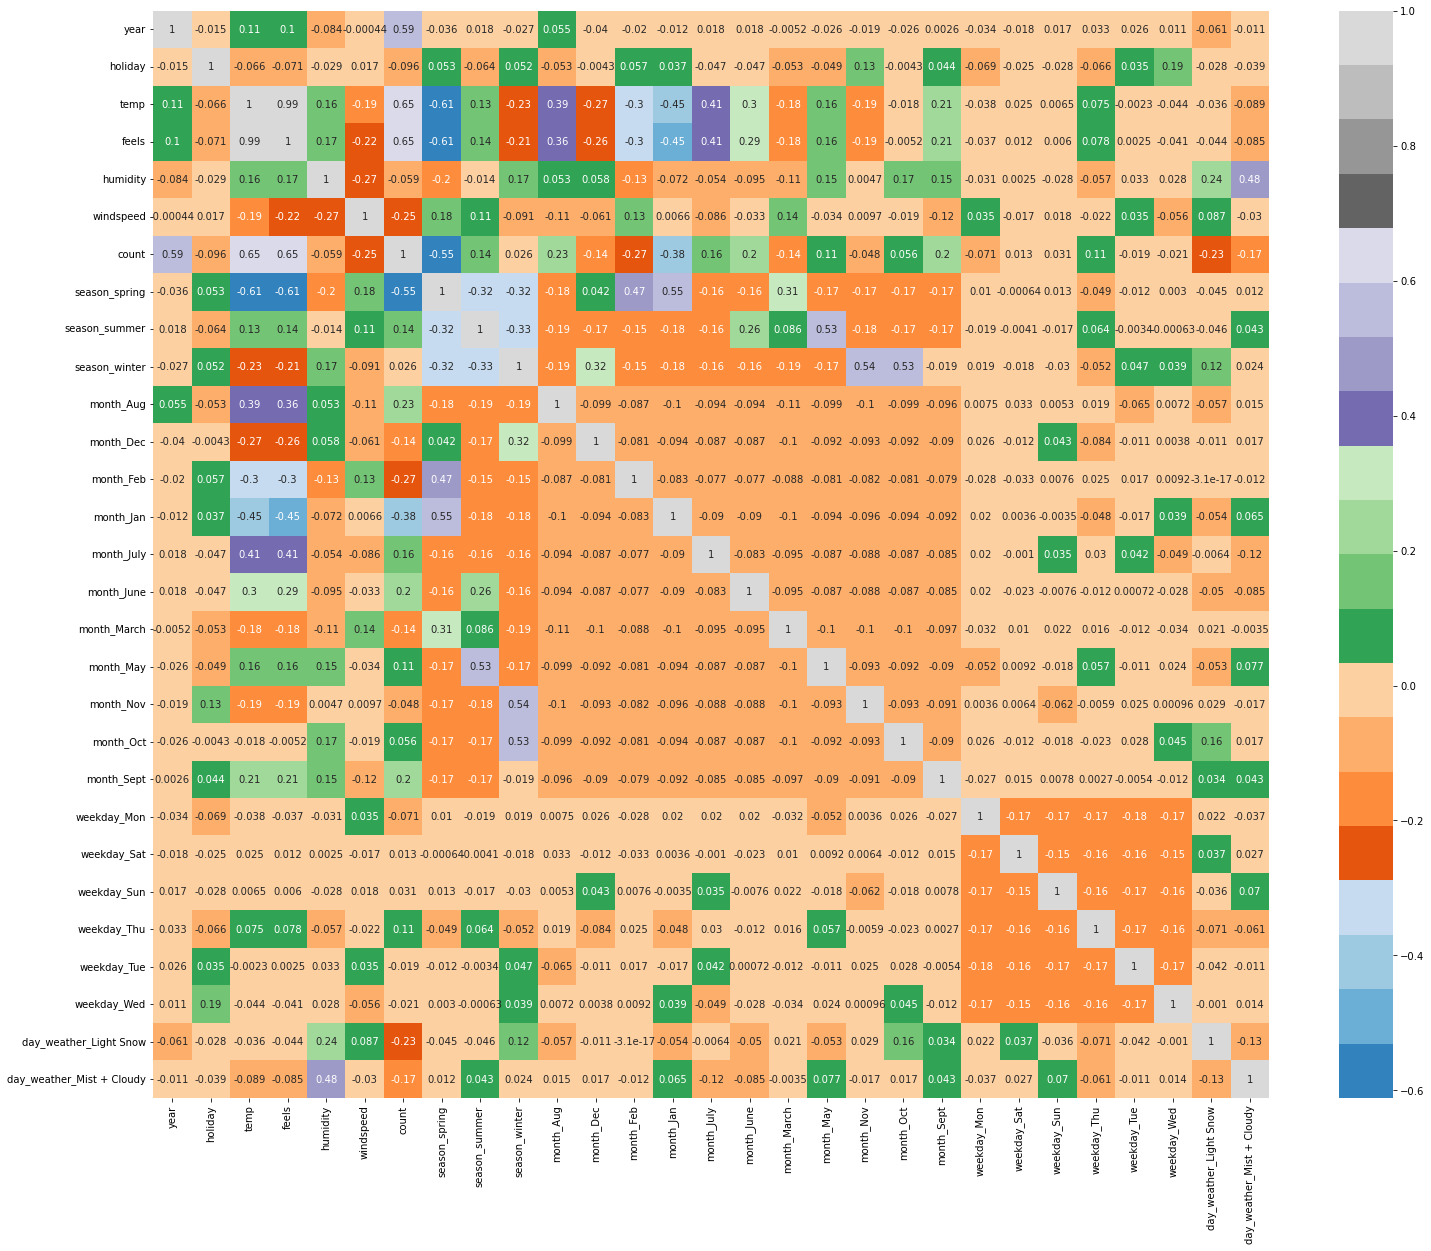

In [28]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = [25,20])
sns.heatmap(ciclo_train.corr(),annot =True, cmap= 'tab20c')
plt.show()

**INSIGHT:** - 
- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable. 
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# Building the model

In [29]:
# Dividing training set into X_train and y_train sets for the model building

y_train = ciclo_train.pop('count')
X_train = ciclo_train

print(y_train.shape)
print(X_train.shape)

(510,)
(510, 28)


### Recursive Feature Elimination
We will be using Recursive Feature Elimination or RFE for selection of the features best suited for developing our model as it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

In [30]:
#importing RFE library for feature selection and after this will perform manual feature selection.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
# using RFE for feature selection and  limiting to selecton to 10 features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [32]:
#creating a list of features selected by RFE

list(zip(X_train, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('feels', False, 18),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_Aug', False, 11),
 ('month_Dec', False, 6),
 ('month_Feb', False, 7),
 ('month_Jan', False, 4),
 ('month_July', True, 1),
 ('month_June', False, 14),
 ('month_March', False, 19),
 ('month_May', False, 10),
 ('month_Nov', False, 5),
 ('month_Oct', False, 15),
 ('month_Sept', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', False, 17),
 ('weekday_Sun', False, 13),
 ('weekday_Thu', False, 16),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 12),
 ('day_weather_Light Snow', True, 1),
 ('day_weather_Mist + Cloudy', False, 3)]

In [33]:
#creating a list of features selected by RFE

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_summer',
       'season_winter', 'month_July', 'month_Sept', 'day_weather_Light Snow'],
      dtype='object')

In [34]:
# feature which are chosen by RFE during feature selection( so un-supported columns)

X_train.columns[~rfe.support_]

Index(['feels', 'season_spring', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_June', 'month_March', 'month_May', 'month_Nov',
       'month_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'day_weather_Mist + Cloudy'],
      dtype='object')

In [35]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,year,holiday,temp,humidity,windspeed,season_summer,season_winter,month_July,month_Sept,day_weather_Light Snow
576,1,0,0.815169,0.725633,0.264686,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0


# First Model

In [36]:
# importing statsmodels to add constant/intercept.

import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          2.79e-186
Time:                        23:41:33   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2682      0.026     10.292      0.000       0.217       0.319
year                       0.2259      0.008     27.118      0.000       0.210       0.242
holiday                   -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp                       0.6200      0.023     27.492      0.000       0.576       0.664
humidity                  -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed                 -0.2059      0.026     -7.889      0.000      -0.257      -0.155
season_summer              0.0800      0.011      7.281      0.000       0.058       0.102
season_winter              0.1390      0.011     12.903      0.000       0.118       0.160
month_July                -0.0482      0.018     -2.606      0.009      -0.085      -0.012
month_Sept                 0.0944      0.016      5.724      0.000       0.062       0.127
day_weather_Light Snow    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# importing libraries to check the VIF values 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,10.29
2,temp,9.29
4,windspeed,3.54
0,year,2.02
5,season_summer,1.76
6,season_winter,1.68
7,month_July,1.55
8,month_Sept,1.29
9,day_weather_Light Snow,1.09
1,holiday,1.04


-----
### Model 2

- Now we have a bearing as to how to proceed further.
- Acc to this vif dataframe we can start popping out features from our model in the said order until the desired model appears.
- Let us remove Humidity due very high VIF because of which all the p-values < 0.05.

In [38]:
X_train_rfe2 = X_train_rfe.drop('humidity', axis = 1)
X_train_lm2 = sm.add_constant(X_train_rfe2)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          4.42e-171
Time:                        23:41:33   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0840      0.018      4.794      0.000       0.050       0.118
year                       0.2329      0.009     26.061      0.000       0.215       0.251
holiday                   -0.0875      0.028     -3.094      0.002      -0.143      -0.032
temp                       0.5854      0.024     24.438      0.000       0.538       0.632
windspeed                 -0.1459      0.027     -5.365      0.000      -0.199      -0.092
season_summer              0.0750      0.012      6.346      0.000       0.052       0.098
season_winter              0.1228      0.011     10.731      0.000       0.100       0.145
month_July                -0.0313      0.020     -1.578      0.115      -0.070       0.008
month_Sept                 0.0822      0.018      4.640      0.000       0.047       0.117
day_weather_Light Snow    -0.2524      0.027     -9.477      0.000      -0.305      -0.200
==============================================================================
Omnibus:                       60.888   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.629
Skew:                          -0.747   Prob(JB):                     3.14e-23
Kurtosis:                       4.625   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,year,2.00
4,season_summer,1.75
6,month_July,1.51
5,season_winter,1.43
7,month_Sept,1.28
8,day_weather_Light Snow,1.06
1,holiday,1.03


-----
### Model 3
- removing feature - 'month_July' coz high p-values(0.115).

In [40]:
X_train_rfe3 = X_train_rfe2.drop('month_July', axis = 1)

# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          9.22e-172
Time:                        23:41:33   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0875      0.017      5.029      0.000       0.053       0.122
year                       0.2334      0.009     26.093      0.000       0.216       0.251
holiday                   -0.0867      0.028     -3.060      0.002      -0.142      -0.031
temp                       0.5682      0.021     26.580      0.000       0.526       0.610
windspeed                 -0.1455      0.027     -5.340      0.000      -0.199      -0.092
season_summer              0.0812      0.011      7.256      0.000       0.059       0.103
season_winter              0.1261      0.011     11.179      0.000       0.104       0.148
month_Sept                 0.0895      0.017      5.229      0.000       0.056       0.123
day_weather_Light Snow    -0.2535      0.027     -9.506      0.000      -0.306      -0.201
==============================================================================
Omnibus:                       62.269   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.317
Skew:                          -0.761   Prob(JB):                     8.20e-24
Kurtosis:                       4.640   Cond. No.                         9.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,year,2.00
4,season_summer,1.55
5,season_winter,1.34
6,month_Sept,1.20
7,day_weather_Light Snow,1.06
1,holiday,1.03


---
**This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).**

### Model Interpretation
- **Hypothesis Testing:**
    - Hypothesis testing states that:
        - H0:B1=B2=...=Bn=0 
        - H1:  at least one  Bn!=0 
        

**Model 3  coefficient values**

- const	       	=		0.0875	
- temp	      	=		0.5682	
- windspeed	  	=		-0.1455	
- Season_summer	=		0.0812	
- Season_winter	=		0.1261	
- Year		=		0.2334	
- Month_Sept		=		0.0895	
- holiday		=		-0.0867	
- day_weather_Light Snow	=	-0.2535	

**INSIGHT:  All our coefficients are not equal to zero. which means We REJECT the NULL HYPOTHESIS**

**F Statistics** : Higher the F-Statistics, more significant the Model is.

- F-statistic: 256.6
- Prob (F-statistic): 9.22e-172

**The F-Statistics value of 256.6 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant**

### The equation for best fitted line based on Model 3:


$Count = 0.0875 + (temp * 0.5682) - (windspeed * 0.1455) + (Season summer * 0.0812) + (Season winter * 0.1261) + (Year * 0.2334) + (Month Sept * 0.0895) - (holiday * 0.0867) - (day_weather_Light Snow * 0.2535)$

### Interpretation of Coefficients:

- **const**: The Constant value of ‘0.0875’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike demand still increases by 0.0417 units.

- **𝑡𝑒𝑚𝑝**: A coefficient value of ‘0.5682’ indicate a unit increase in temp variable, increases the bike demand by 0.5682 units.

- **𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑**: A coefficient value of ‘-0.1455’ indicate a unit decrease in windspeed variable, decreases bike demand by 0.1455 units.

- **𝑆𝑒𝑎𝑠𝑜𝑛_𝑠𝑢𝑚𝑚𝑒𝑟**: A coefficient value of ‘0.0812’ indicate a unit increase in Season_summer variable, increases bike demand by 0.0812 units.

- **𝑆𝑒𝑎𝑠𝑜𝑛_𝑤𝑖𝑛𝑡𝑒𝑟**: A coefficient value of ‘0.1261’ indicate a unit increase in Season_winter variable, increases bike demand by 0.1261 units.

- **𝑌𝑒𝑎𝑟**: A coefficient value of ‘0.2334’ indicate a unit increase in Year variable, increases the bike demand by 0.2334 units.

- **𝑀𝑜𝑛𝑡ℎ_𝑆𝑒𝑝𝑡**: A coefficient value of ‘0.0895’ indicate a unit increase in Month_Sept variable, increases the bike demand by 0.0895 units.

- **ℎ𝑜𝑙𝑖𝑑𝑎𝑦_𝑌𝑒𝑠**: A coefficient value of ‘-0.0867’ indicate a unit decrease in holiday_Yes variable, decreases bike demand by 0.0867 units.

- **day_weather_Light Snow**: A coefficient value of ‘-0.2535’ indicate a unit increase if the weather is good, decreases the bike demand by 0.2535 units.

# PREDICTIONS

In [42]:
y_train_pred = lr3.predict(X_train_lm3)

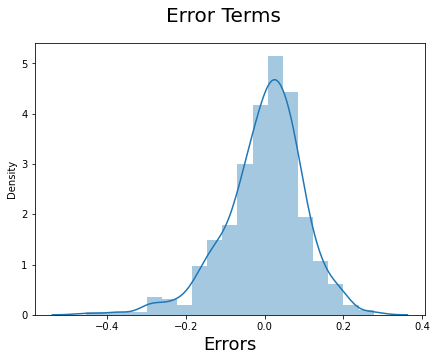

In [43]:
# residual calculations
res = y_train - y_train_pred

# Plot the histogram of the error terms

fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 19)
fig.suptitle('Error Terms', fontsize = 20)        # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

**INSIGHT:** - From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

# Final Model

Now we will go ahead and make predictions using the final model (Model 3)

In [44]:
# Apply scaler()  in test dataset. 

ciclo_test[num_vars] = scaler.fit_transform(ciclo_test[num_vars])
ciclo_test.head()

,year,holiday,temp,feels,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,day_weather_Light Snow,day_weather_Mist + Cloudy
184,0,1,0.837241,33.27085,0.534223,0.149393,0.704300,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,0.911423,36.04875,0.470417,0.231142,0.725421,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0.496221,22.85230,0.777843,0.443398,0.278853,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,0.890387,34.24915,0.236659,0.449707,0.545512,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0.821739,32.19710,0.070765,0.682387,0.569148,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [45]:
ciclo_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       220 non-null    int64  
 1   holiday                    220 non-null    int64  
 2   temp                       220 non-null    float64
 3   feels                      220 non-null    float64
 4   humidity                   220 non-null    float64
 5   windspeed                  220 non-null    float64
 6   count                      220 non-null    float64
 7   season_spring              220 non-null    uint8  
 8   season_summer              220 non-null    uint8  
 9   season_winter              220 non-null    uint8  
 10  month_Aug                  220 non-null    uint8  
 11  month_Dec                  220 non-null    uint8  
 12  month_Feb                  220 non-null    uint8  
 13  month_Jan                  220 non-null    uint8

In [46]:
ciclo_test.describe()

,year,holiday,temp,feels,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,day_weather_Light Snow,day_weather_Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.546074,24.250312,0.508362,0.418803,0.517923,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.248645,8.281075,0.200875,0.187683,0.239498,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,4.941955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.329310,17.090025,0.361079,0.284201,0.361045,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.545492,24.700000,0.491299,0.403318,0.520681,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.756414,31.124313,0.650989,0.523975,0.687956,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,41.318550,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
y_test= ciclo_test.pop('count')
X_test= ciclo_test

print(y_test.shape)
print(X_test.shape)

(220,)
(220, 28)


In [48]:
test_col = X_train_rfe3.columns
X_test = X_test[test_col]

X_test_lm3 = sm.add_constant(X_test)
X_test_lm3.head()

,const,year,holiday,temp,windspeed,season_summer,season_winter,month_Sept,day_weather_Light Snow
184,1.0,0,1,0.837241,0.149393,0,0,0,0
535,1.0,1,0,0.911423,0.231142,1,0,0,0
299,1.0,0,0,0.496221,0.443398,0,1,0,0
221,1.0,0,0,0.890387,0.449707,0,0,0,0
152,1.0,0,0,0.821739,0.682387,1,0,0,0


In [49]:
y_test_pred = lr3.predict(X_test_lm3)

### Model Evaluation


Text(0, 0.5, 'y_test_pred')

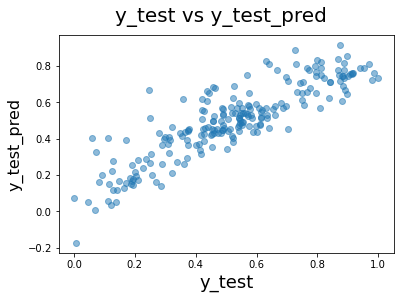

In [50]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 

**We can see there is positive linear relationship between y_test and y_test_pred**

# R^2 Analysis

In [51]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('Train data r^2 :',round((r2_train*100),2))
print('Test data r^2 :',round((r2_test*100),2))



Train data r^2 : 80.38
Test data r^2 : 76.19


### Adjusted R^2 Value for TEST

$Adj r^2 = 1-(1-R^2)*(n-1)/(n-p-1)$

In [52]:
# n for test data ,n1 for train data is number of rows
n1 = X_train_rfe3.shape[0]
n = X_test.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test.shape[1]
p1 = X_train_rfe3.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)


print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))
print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))


Train data adjusted r^2 : 80.07
Test data adjusted r^2 : 75.29


## FINAL RESULT : 
- Test data r^2 : 76.19
- Train data r^2 : 80.38

- Test data adjusted r^2 : 75.29
- Train data adjusted r^2 : 80.07

This seems to be a really good model that can very well 'Generalize' various datasets. 

**As per our final Model, the below predictor variables influences bike booking :**
- Temperature (temp)
- September Month 
- Year -2019
- Summer Seaon
- Winter Seson
- If its a holiday
- If the weather is clear/Good
- Speed of the Wind

# THANK YOU